In [1]:
%load_ext blackcellmagic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.optimize import root_scalar
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rc('text', usetex=True)
from numba import jit, njit

#  Pogledamo kvadratno opno:

In [2]:
N = 40
h = 1 / (N + 1)


def UU(N: int):
    """Construct a symmetric matrix A for twodimensional vibration modes on square geometry."""
    U = np.zeros((N ** 2, N ** 2))
    for i in range(N * N):
        U[i][i] = 4
    for i in range(0, N * N - 1):
        if ((N - 1) * i - 1) % N == 0:
            U[i][i + 1] = 0
            U[i + 1][i] = 0
        else:
            U[i][i + 1] = -1
            U[i + 1][i] = -1
    for i in range(N * N - N):
        U[i + N][i] = -1
        U[i][i + N] = -1
    return U


A = UU(N)
eigenvalues, eigenvectors = scipy.linalg.eigh(A)

In [3]:
eigenvalues, eigenvectors = scipy.linalg.eigh(A)
eigenvalues_sparse, eigenvectors_sparse = scipy.sparse.linalg.eigsh(A, which="SM", k=1600)

/home/peter/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1593: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


In [4]:
eigenvalues.shape

(1600,)

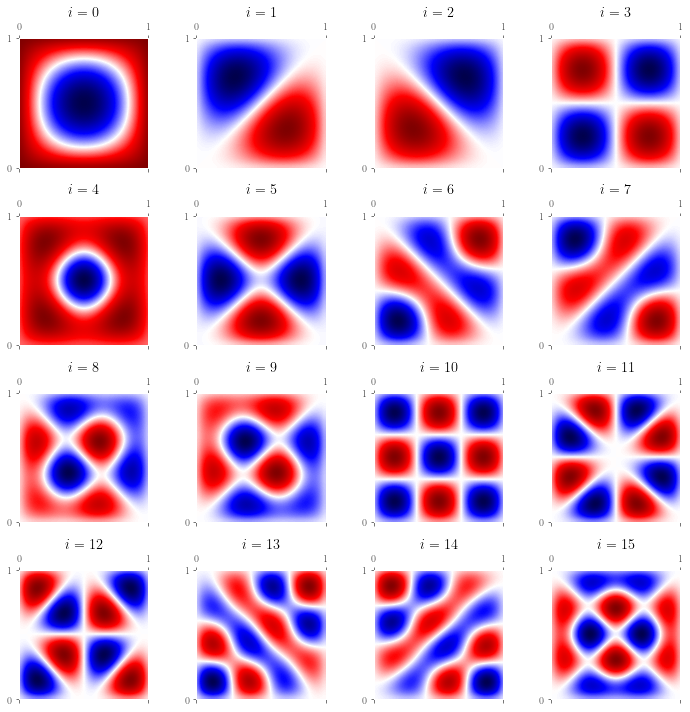

In [5]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))
axes = axes.reshape(-1)
for i in range(16):
    axes[i].matshow(
        eigenvectors_sparse[:, i].reshape((N, -1)),
        extent=((0, 1, 0, 1)),
        cmap="seismic",
        interpolation="bicubic",
    )
    axes[i].set_title(fr"$i={{{i}}}$")
plt.tight_layout()
plt.savefig("1-0-nihajni_nacini_sparse.pdf")
plt.show()

In [6]:
eigenvalues.shape

(1600,)

In [7]:
np.allclose(eigenvalues_sparse[:16], eigenvalues[:16])

True

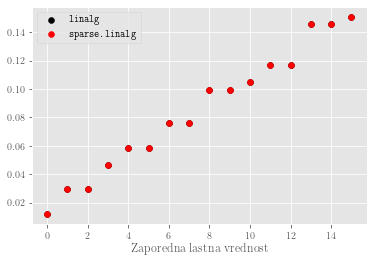

In [8]:
%matplotlib inline
plt.scatter(np.arange(0, 16 ,1), eigenvalues[:16], c="k", label=r"\texttt{linalg}")
plt.scatter(np.arange(0, 16, 1), eigenvalues_sparse[:16], c="r", label=r"\texttt{sparse.linalg}")
plt.xlabel("Zaporedna lastna vrednost")
plt.legend()
plt.savefig("1-0-spekter-zoom.pdf")
plt.show()

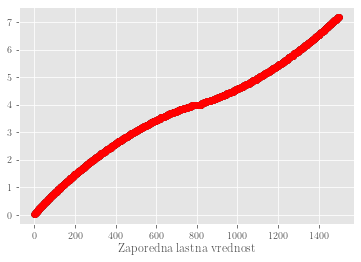

In [9]:
M = 1500
plt.scatter(np.arange(0, M ,1), eigenvalues[:M], c="k", label="linag")
plt.scatter(np.arange(0, M ,1), eigenvalues_sparse[:M], c="r", label="sparse.linalg")
plt.xlabel("Zaporedna lastna vrednost")
#plt.savefig("1-0-spekter.pdf")
plt.show()

## Nadaljujmo, torej, dragi bralec, k potenčni metodi, za isto kvadratno opno:

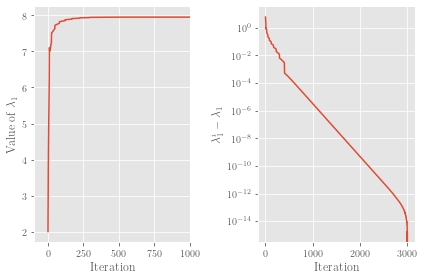

In [33]:

def power_method(A, num_iter=1000):
    values = np.empty(num_iter, dtype=float)
    b = np.full(A.shape[0], 1.0)
    for i in range(num_iter):
        prod = np.dot(A, b)
        norm = np.max(prod)
        #print(b, norm)
        b = prod / norm
        values[i] = norm
    return norm, values
value, potek = power_method(A)


fig, [ax1, ax2] = plt.subplots(ncols=2)
ax1.set_xlabel(r"Iteration")
ax1.set_ylabel(r"Value of $\lambda_1$")
ax1.set_xlim((-100, 1000))
# ax1.set_yscale("log")
ax2.set_yscale("log")
ax2.set_xlabel(r"Iteration")
ax2.set_ylabel(r"$\lambda_1^i - \lambda_1$")


value, potek = power_method(A, num_iter=3000)
ax1.plot(potek, )
ax2.plot(np.abs(potek[-1] - potek))


plt.tight_layout()
plt.savefig("1-0-powermethod.pdf")
plt.show()

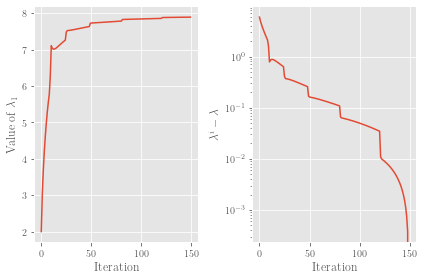

In [4]:

def inverse_power_method(A, sigma, num_iter=1000):
    values = np.zeros(num_iter, dtype=float)
    b = np.full(A.shape[0], 1.0)
    for i in range(num_iter):
        print(i, end="\r")
        mat = np.linalg.inv(A - sigma * np.identity(A.shape[0]))
        prod = np.dot(A, b)
        norm = np.max(prod)
        #print(b, norm)
        b = prod / norm
        values[i] = norm
    return norm, values





fig, [ax1, ax2] = plt.subplots(ncols=2)
ax1.set_xlabel(r"Iteration")
ax1.set_ylabel(r"Value of $\lambda_1$")
#ax1.set_xlim((-100, 1000))
# ax1.set_yscale("log")
ax2.set_yscale("log")
ax2.set_xlabel(r"Iteration")
ax2.set_ylabel(r"$\lambda^i - \lambda$")


value, potek = inverse_power_method(A, 8, num_iter=150)
ax1.plot(potek, )
ax2.plot(np.abs(potek[-1] - potek))


plt.tight_layout()
plt.savefig("1-0-inverse_powermethod.pdf")
plt.show()

In [5]:

sigmas = np.linspace(0, 8, 100)
eigenvalues_inverse = np.zeros_like(sigmas)
for i, sigma in enumerate(sigmas):
    print(f"i = {i}")
    value,_ = inverse_power_method(A, sigma, num_iter = 200)
    eigenvalues_inverse[i] = value
    

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88
i = 89
i = 90
i = 91
i = 92
i = 93
i = 94
i = 95
i = 96
i = 97
i = 98
i = 99


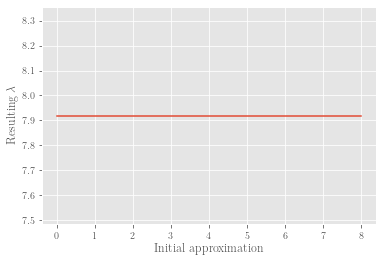

In [6]:
fig, ax = plt.subplots()
ax.plot(sigmas, eigenvalues_inverse)
ax.set_xlabel("Initial approximation")
ax.set_ylabel(r"Resulting $\lambda$")
plt.savefig("1-0-inverse_powermethod_sweep.pdf")
plt.show()

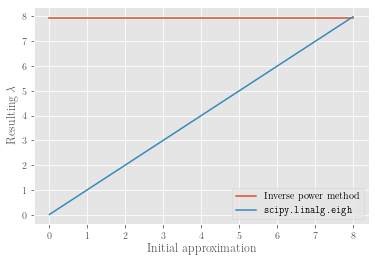

In [7]:
fig, ax = plt.subplots()
ax.plot(sigmas, eigenvalues_inverse, label = "Inverse power method")
ax.plot(eigenvalues, eigenvalues, label = r"\texttt{scipy.linalg.eigh}")
ax.set_xlabel("Initial approximation")
ax.set_ylabel(r"Resulting $\lambda$")
plt.legend()
plt.savefig("1-0-inverse_powermethod_sweep_comparison.pdf")
plt.show()

In [30]:
def inverse_power_method(A, sigma, num_iter=1000):
    values = np.zeros(num_iter, dtype=float)
    b = np.full(A.shape[0], 3)
    for i in range(num_iter):
        mat = np.linalg.inv(A - sigma * np.identity(A.shape[0]))
        prod = np.dot(A, b)
        norm = np.max(prod)
        #norm = np.linalg.norm(prod)
        #print(b, norm)
        b = prod / norm
        values[i] = norm
        sigma = np.dot(b.T, np.dot(A, b))
    return norm, values
AA = np.array([[-4, 14, 0],
               [-5, 13, 0],
               [-1, 0, 2]])
sigmas = np.linspace(-300, 1000, 200)
values = np.zeros_like(sigmas)
for i, sigma in enumerate(sigmas):
    value, _ = inverse_power_method(AA, sigma, num_iter=10)
    values[i] = value

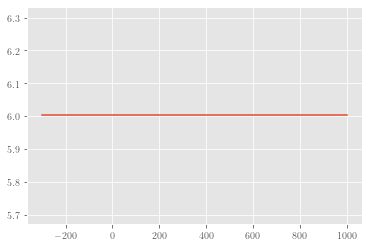

In [31]:
plt.plot(sigmas, values)
plt.show()

#  Implementacija različnih gostot

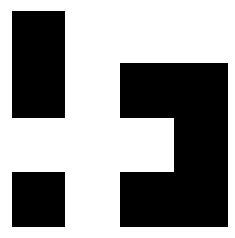

In [27]:
def make_B(A, ro1, ro2):
    N = int(np.sqrt(A.shape[0]))
    b_mat = np.zeros((N,N))
    lookup = {
        (0,0) : ro1,
        (1,0) : ro1,
        (3,0) : ro1,
        (1,2) : ro1,
        (1,3) : ro1,
        (3,3) : ro1,
        (3,2) : ro1,
        (2,3) : ro1
    }
    for i in range(N):
        for j in range(N):
            x = (4 * i)//N
            y = (4 * j)//N
            b_mat[j, i] = lookup.get((y,x), ro2)
    return b_mat
b_mat = make_B(A, 1, 2)
fig, ax = plt.subplots()
ax.matshow(b_mat, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
plt.box(True)
plt.savefig("1-figura.pdf")
plt.show()
    
    

In [30]:
b = np.diag(make_B(A, 1,10).reshape(-1))
eigenvalues, eigenvectors = scipy.linalg.eigh(A, b)

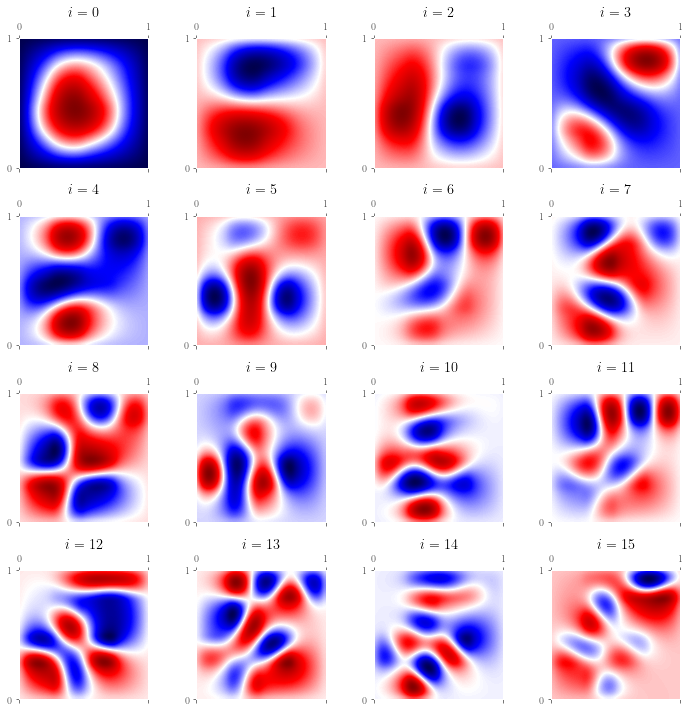

In [32]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))
axes = axes.reshape(-1)
for i in range(16):
    axes[i].matshow(
        eigenvectors[:, i].reshape((N, -1)),
        extent=((0, 1, 0, 1)),
        cmap="seismic",
        interpolation="bicubic",
    )
    axes[i].set_title(fr"$i={{{i}}}$")
plt.tight_layout()
plt.savefig("1-1-nihajni_nacini.pdf")
plt.show()

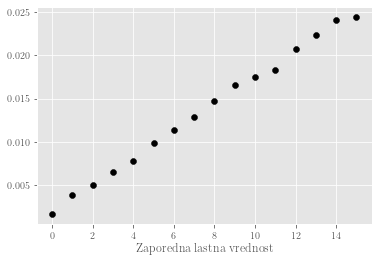

In [34]:
plt.scatter(np.arange(0, 16 ,1), eigenvalues[:16], c="k", label=r"\texttt{linalg}")
plt.xlabel("Zaporedna lastna vrednost")
plt.savefig("1-1-spekter-zoom.pdf")
plt.show()

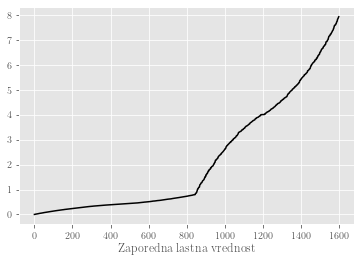

In [35]:
plt.plot( eigenvalues, c="k", label=r"\texttt{linalg}")
plt.xlabel("Zaporedna lastna vrednost")
plt.savefig("1-1-spekter.pdf")
plt.show()

In [36]:
b = np.diag(make_B(A, 10, 1).reshape(-1))
eigenvalues, eigenvectors = scipy.linalg.eigh(A, b)

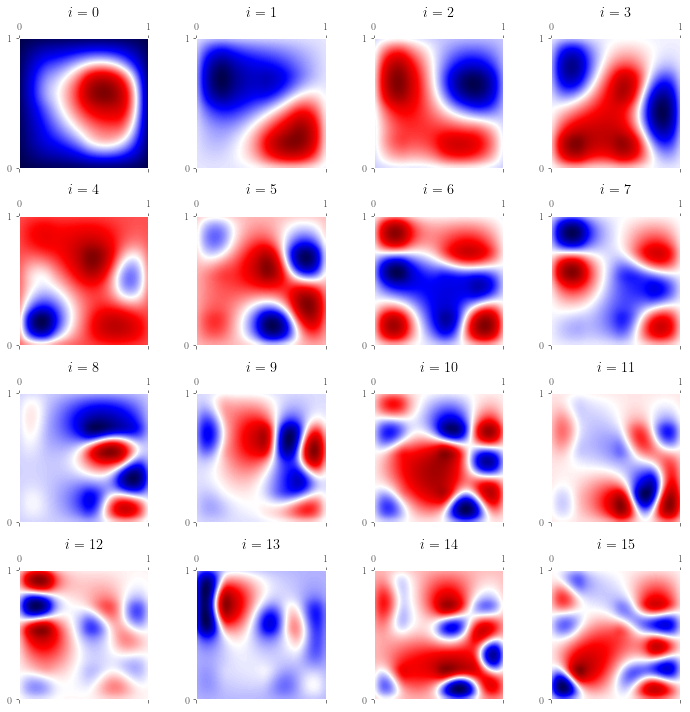

In [37]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))
axes = axes.reshape(-1)
for i in range(16):
    axes[i].matshow(
        eigenvectors[:, i].reshape((N, -1)),
        extent=((0, 1, 0, 1)),
        cmap="seismic",
        interpolation="bicubic",
    )
    axes[i].set_title(fr"$i={{{i}}}$")
plt.tight_layout()
plt.savefig("1-1-nihajni_nacini_inverted.pdf")
plt.show()

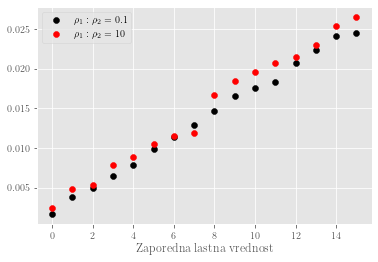

In [40]:
b = np.diag(make_B(A, 1,10).reshape(-1))
eigenvalues, eigenvectors = scipy.linalg.eigh(A, b)

plt.scatter(np.arange(0, 16 ,1), eigenvalues[:16], c="k", label=r"${\rho_1}:{\rho_2} = 0.1$")

b = np.diag(make_B(A, 10,1).reshape(-1))
eigenvalues, eigenvectors = scipy.linalg.eigh(A, b)

plt.scatter(np.arange(0, 16 ,1), eigenvalues[:16], c="r", label=r"${\rho_1}:{\rho_2} = 10$")
plt.legend()
plt.xlabel("Zaporedna lastna vrednost")
plt.savefig("1-1-spekter-zoom_both.pdf")
plt.show()

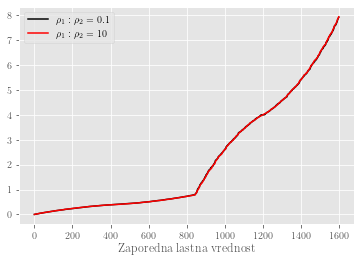

In [44]:
b = np.diag(make_B(A, 1,10).reshape(-1))
eigenvalues, eigenvectors = scipy.linalg.eigh(A, b)

plt.plot(eigenvalues, c="k", label=r"${\rho_1}:{\rho_2} = 0.1$")

b = np.diag(make_B(A, 10,1).reshape(-1))
eigenvalues, eigenvectors = scipy.linalg.eigh(A, b)

plt.plot(eigenvalues, c="r", label=r"${\rho_1}:{\rho_2} = 10$")
plt.legend()
plt.xlabel("Zaporedna lastna vrednost")
plt.savefig("1-1-spekter_both.pdf")
plt.show()

In [42]:
b = np.diag(make_B(A, 1000, 1).reshape(-1))
eigenvalues, eigenvectors = scipy.linalg.eigh(A, b)

0


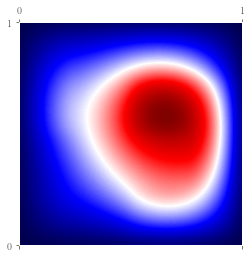

1


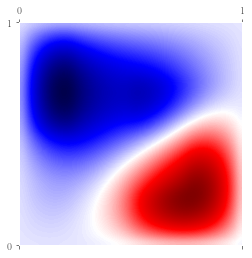

800


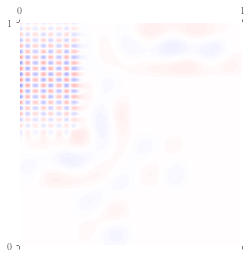

801


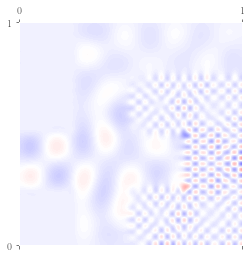

849


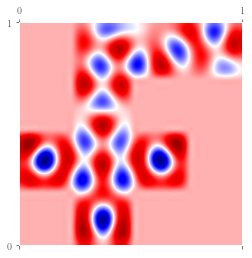

880


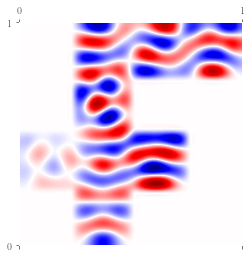

900


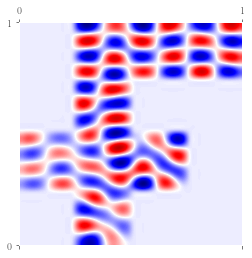

In [59]:
for i in [0, 1, 800, 801, 849, 880, 900]:
    print(i)
    plt.matshow(eigenvectors[:, i].reshape((N, -1)), extent=(0,1,0,1), cmap="seismic", interpolation="bicubic")
    plt.savefig(f"1-1-eigenmode-{i}.jpg")
    plt.show()

# Druga naloga: polkrožna opna

In [138]:
N = 40
h_r = 1 / N
h_phi = np.pi / N
rs = np.linspace(0, 1, N, endpoint=True)
phis = np.linspace(0, np.pi, N, endpoint=True)

def UU(N):
    U = np.zeros((N * N, N * N))
    for i in range(1, N * N + 1):
        U[i - 1][i - 1] = 2 * (1 / (h_r ** 2) + 1 / (h_r * h_r * h_phi * h_phi * i * i))
    for i in range(1, N * N):
        if ((N - 1) * (i - 1) - 1) % N == 0:
            U[i - 1][i] = 0
            U[i][i - 1] = 0
        else:
            U[i - 1][i] = -1 / ((h_r * i * h_phi) ** 2)
            U[i][i - 1] = -1 / ((h_r * i * h_phi) ** 2)
    for i in range(1, N * N - N + 1):
        U[i + N - 1][i - 1] = -(1 / (h_r ** 2)) - 1 / (2 * i * (h_r ** 2))
        U[i - 1][i + N - 1] = -(1 / (h_r ** 2)) + 1 / (2 * i * (h_r ** 2))
    return U


A = UU(N)

In [139]:
eigenvalues, eigenvectors = scipy.linalg.eigh(A)

In [168]:
eigenvalues_sparse, eigenvectors_sparse = scipy.sparse.linalg.eigs(A, k=6)

In [170]:
eigenvalues_sparse[0]

(653094.4841542918+0j)

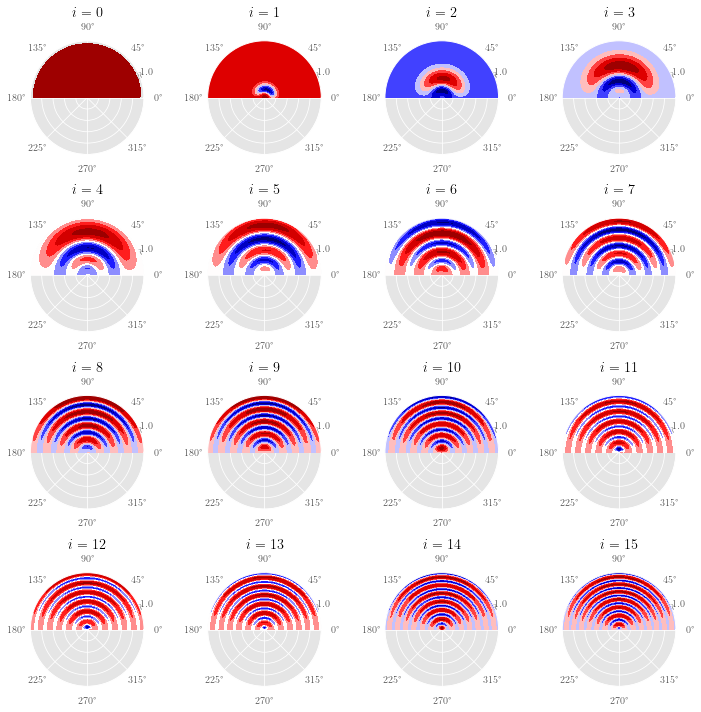

In [159]:
rrs, phiphis = np.meshgrid(rs, phis)




fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(10, 10),subplot_kw=dict(projection='polar'))
axes = axes.reshape(-1)
for i in range(16):
    axes[i].contourf(phiphis, rrs, eigenvectors[:, i].reshape((N, -1)).astype(float), cmap="seismic")
    axes[i].set_title(fr"$i={{{i}}}$")
plt.tight_layout()
plt.savefig("2-nihajni_nacini.pdf")
plt.show()

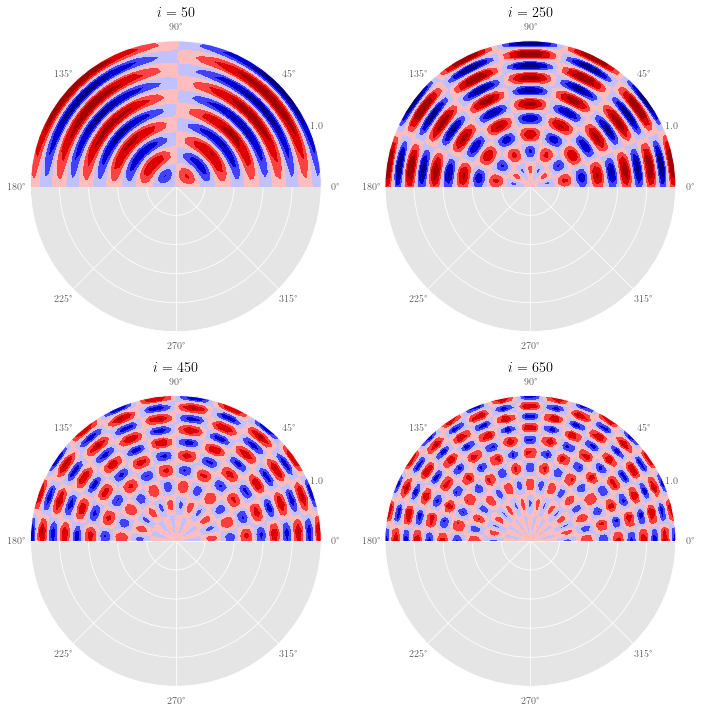

In [172]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10),subplot_kw=dict(projection='polar'))
axes = axes.reshape(-1)
indices = [50, 250, 450, 650]
for i in range(4):
    ii = indices[i]
    axes[i].contourf(phiphis, rrs, eigenvectors[:, ii].reshape((N, -1)).astype(float), cmap="seismic")
    axes[i].set_title(fr"$i={{{ii}}}$")
plt.tight_layout()
plt.savefig("2-nihajni_nacini_miks.pdf")
plt.show()

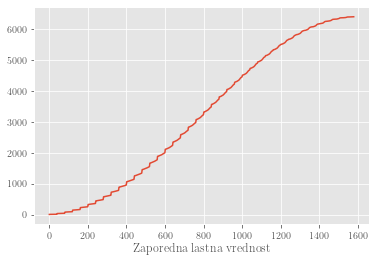

In [166]:
plt.plot(eigenvalues[1:-20])
plt.xlabel("Zaporedna lastna vrednost")
plt.savefig("2-spekter.pdf")
plt.show()

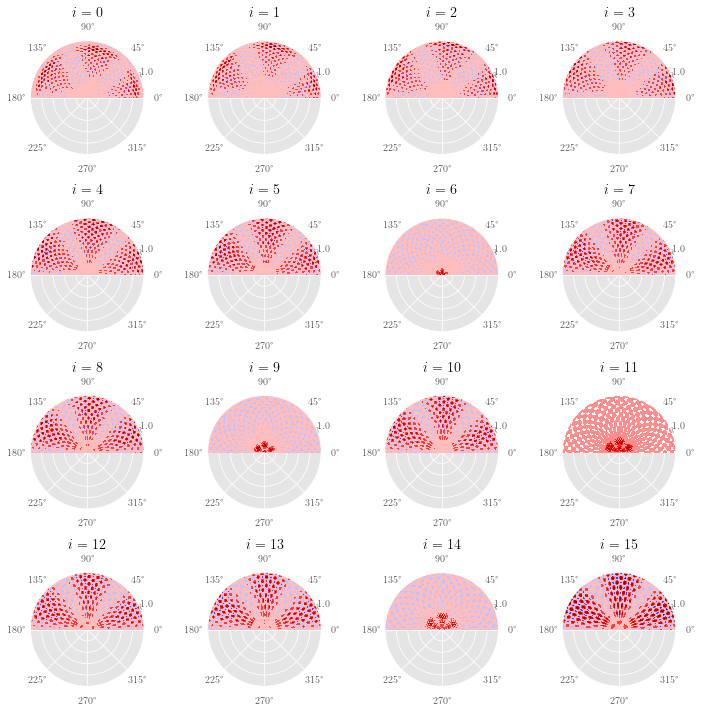

In [174]:
rrs, phiphis = np.meshgrid(rs, phis)




fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(10, 10),subplot_kw=dict(projection='polar'))
axes = axes.reshape(-1)
for i in range(16):
    axes[i].contourf(phiphis, rrs, eigenvectors[:, -i-100].reshape((N, -1)).astype(float), cmap="seismic")
    axes[i].set_title(fr"$i={{{i}}}$")
plt.tight_layout()
#plt.savefig("2-nihajni_nacini.pdf")
plt.show()

In [179]:
%matplotlib qt
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(projection='polar'))
ax.contourf(phiphis, rrs, eigenvectors[:, -111].reshape((N, -1)).astype(float), cmap="seismic")
plt.show()